# 第5章 教師あり学習：回帰（2）
## 5.3 n次元線形回帰モデル
サンプルコードなし

## 5.4 線形基底関数モデル

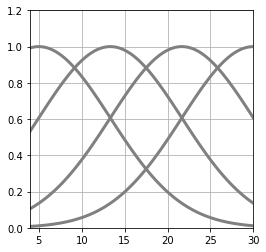

In [27]:
# リスト 5-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データのロード -------------------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

# リスト 5-2-(2)
# ガウス関数 -----------------------------------
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

# リスト 5-2-(3)
# メイン ---------------------------------------
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


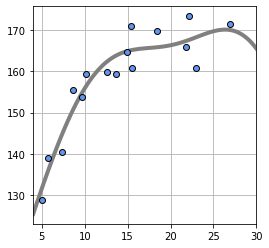

In [29]:
# リスト 5-2-(4)
# 線形基底関数モデル ----------------------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

# リスト 5-2-(5)
# 線形基底関数モデル MSE ------------------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t) ** 2)
    return mse

# リスト 5-2-(6)
# 線形基底関数モデル 解析解 ---------------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

# リスト 5-2-(7)
# ガウス既定関数表示 ----------------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

# メイン ---------------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W=' + str(np.round(W, 1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

## 5.5 オーバーフィッティングの問題

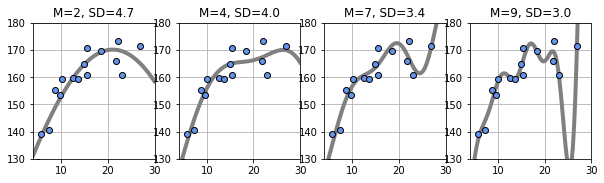

In [34]:
# リスト 5-2-(8)
plt.figure(figsize=(10, 2.5))
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X, T, W)

    plt.title('M={0:d}, SD={1:.1f}'.format(M[i], np.sqrt(mse)))

plt.show()

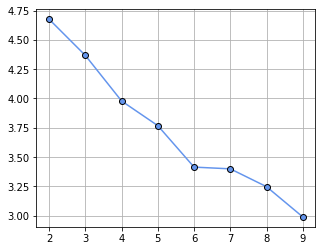

In [42]:
# リスト 5-2-(9)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))

plt.plot(M, mse2, marker='o', markeredgecolor='black', color='cornflowerblue')
plt.grid(True)
plt.show()

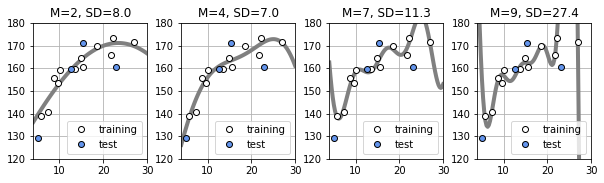

In [55]:
# リスト 5-2-(10)
# 訓練データとテストデータ ----------------------------
X_test = X[:int(X_n / 4)]
T_test = T[:int(X_n / 4)]
X_train = X[int(X_n / 4):]
T_train = T[int(X_n / 4):]

# メイン --------------------------------------------
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o', linestyle='None', markeredgecolor='black', color='white', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(120, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title('M={0:d}, SD={1:.1f}'.format(M[i], np.sqrt(mse)))
plt.show()

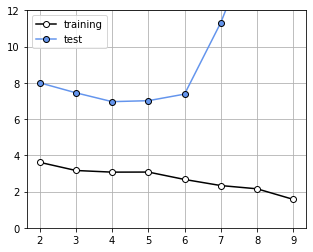

In [56]:
# リスト 5-2-(11)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))

plt.plot(M, mse_train, marker='o', linestyle='-', markerfacecolor='white', markeredgecolor='black', color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-', markeredgecolor='black', color='cornflowerblue', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

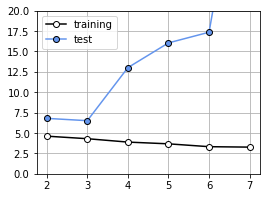

In [60]:
# リスト 5-2-(12)
# K 分割交差検証 -------------------------------------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

# リスト 5-2-(13)
np.fmod(range(10), 5)

# リスト 5-2-(14)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

# リスト 5-2-(15)
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)

mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-', markerfacecolor='w', color='k', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-', markeredgecolor='black', color='cornflowerblue', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

SD=4.37 cm


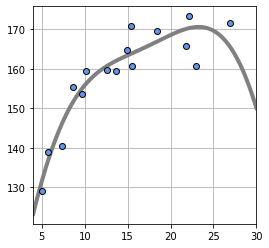

In [61]:
# リスト 5-2-(16)
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

## 5.6 新しいモデルの生成

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


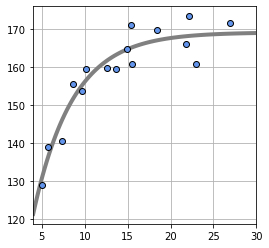

In [62]:
# リスト 5-2-(17)
# モデルA -------------------------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y

# モデルA表示 ---------------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

# モデルAのMSE --------------------------------------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

# リスト 5-2-(18)
from scipy.optimize import minimize

# モデルAのパラメータ最適化
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method='powell')
    return res1.x

# リスト 5-2-(19)
# メイン --------------------------------------------
plt.figure(figsize=(4, 4))
W_init = [100, 0, 0]
W = fit_model_A(W_init, X, T)
print('w0={0:.1f}, w1={1:.1f}, w2={2:.1f}'.format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_model_A(W, X, T)
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

## 5.7 モデルの選択

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


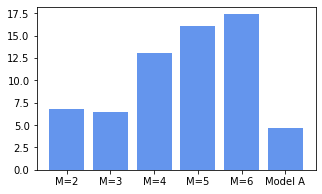

In [64]:
# リスト 5-2-(20)
# 交差検定 model_A ----------------------------------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

# メイン --------------------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print('Gauss(M=3) SD={0:.2f} cm'.format(mean_Gauss_test[1]))
print('Model A SD={0:.2f} cm'.format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ['M=2', 'M=3', 'M=4', 'M=5', 'M=6', 'Model A']
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align='center', facecolor='cornflowerblue')
plt.show()